#### Loading the dataset for One time Entertainment licenses into a dataframe
The dataset is being loaded and we are converting license dates into proper datetime format

In [2]:
import pandas as pd

# Load the dataset
file_path = 'one_time_entertainment.csv'
license_data = pd.read_csv(file_path)

# Data Preprocessing
license_data['issued'] = pd.to_datetime(license_data['issued'], errors='coerce')
license_data['expires'] = pd.to_datetime(license_data['expires'], errors='coerce')

In [3]:
license_data.head()

,license_num,status,license_type,issued,expires,dba_name,comments,location_comments,applicant,contact,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy
0,CAL1-143848,Inactive,One-Time Entertainment,NaT,2015-05-15,Lung Force Walk Boston,NaN,NaN,Marianne Gibson,NaN,,(617)413-6579,NaN,0 Boston Common,Boston,MA,2108,NaN,NaN
1,CAL1-143355,Inactive,One-Time Entertainment,NaT,2015-05-11,Acoustic on Main (Boston Main Street Districts),NaN,NaN,Department of Neighborhood Development,NaN,Abby Furey,(617)635-0328,NaN,1 Citywide ST,Boston,MA,2128,0.000000,0.000000e+00
2,CAL1-143355,Inactive,One-Time Entertainment,NaT,2015-05-11,Acoustic on Main (Boston Main Street Districts),NaN,NaN,Department of Neighborhood Development,NaN,Abby Furey,(617)635-0328,NaN,1 Citywide ST,Boston,MA,2128,0.000000,0.000000e+00
3,CAL1-143276,Inactive,One-Time Entertainment,NaT,NaT,The Advent School Annual Book Fair,NaN,NaN,Ben Starr,NaN,Jeff Morgan,(617)721-6065,NaN,99- W Cedar ST,Boston,MA,2114,772422.916042,2.956787e+06
4,CAL1-142685,Inactive,One-Time Entertainment,NaT,NaT,Congenital Heart Walk - Parkman Bandstand,NaN,NaN,Kim Edgren,NaN,Kim Edgren,(508)735-4582x0,NaN,0 Boston Common,Boston,MA,2108,NaN,NaN


##### Looking for additional information on the data for preprocessing

In [4]:
license_data.info

<bound method DataFrame.info of        license_num    status            license_type     issued    expires  \
0      CAL1-143848  Inactive  One-Time Entertainment        NaT 2015-05-15   
1      CAL1-143355  Inactive  One-Time Entertainment        NaT 2015-05-11   
2      CAL1-143355  Inactive  One-Time Entertainment        NaT 2015-05-11   
3      CAL1-143276  Inactive  One-Time Entertainment        NaT        NaT   
4      CAL1-142685  Inactive  One-Time Entertainment        NaT        NaT   
...            ...       ...                     ...        ...        ...   
17103  CAL1-133857   Expired  One-Time Entertainment 2014-09-17 2014-09-15   
17104  CAL1-133852   Expired  One-Time Entertainment 2014-09-17 2014-09-14   
17105  CAL1-133810   Expired  One-Time Entertainment 2014-09-16 2014-09-20   
17106  CAL1-133680   Expired  One-Time Entertainment 2014-09-15 2014-09-22   
17107  CAL1-133627   Expired  One-Time Entertainment 2014-09-15 2014-09-22   

                               

In [5]:
license_data.columns

Index(['license_num', 'status', 'license_type', 'issued', 'expires',
       'dba_name', 'comments', 'location_comments', 'applicant', 'contact',
       'manager', 'day_phone', 'evening_phone', 'address', 'city', 'state',
       'zip', 'gpsx', 'gpsy'],
      dtype='object')

#### Measuring the vibrancy of the licensing data
The function computes the vibrancy score for each city in the dataset. The vibrancy score is calculated using three components:
1. Active Licenses: The count of licenses with a status of "Active".
2. License Diversity: The number of unique license types in a city.
3. Unique DBA(Doing Business As) names: Number of unique businesses that are applying for a license

In [6]:
# Measure of Vibrancy
def calculate_vibrancy(data):
    # Grouping by neighborhood (city) and aggregating data
    data['city_normalized'] = data['city'].str.title()
    vibrancy = (
        data.groupby('city_normalized')
        .agg(
            active_licenses=('status', lambda x: (x == 'Active').sum()),
            license_diversity=('license_type', 'nunique'),
            unique_dba_names=('dba_name', 'nunique')  
        )
        .reset_index()
    )
    
    # Normalizing and creating a composite vibrancy score
    vibrancy['vibrancy_score'] = (
        vibrancy['active_licenses'] +
        vibrancy['license_diversity'] * 2 +  
        vibrancy['unique_dba_names'] * 1.5 
    )
    return vibrancy

vibrancy_data = calculate_vibrancy(license_data)


In [7]:
vibrancy_data

,city_normalized,active_licenses,license_diversity,unique_dba_names,vibrancy_score
0,Allston,7,3,194,304.0
1,Boston,72,3,3073,4687.5
2,Boston/Roxbury,0,1,2,5.0
3,Brighton,6,2,194,301.0
4,Charlestown,2,3,118,185.0
5,Dorchester,31,2,476,749.0
6,Downtown/Financial District,0,1,2,5.0
7,East Boston,13,2,272,425.0
8,Hyde Park,8,2,105,169.5
9,Jamaica Plain,4,2,293,447.5


##### Saving the resulting dataframe into a csv file

In [8]:
vibrancy_data.to_csv('one_time_entertainment_data_boston.csv')

##### Plotting the vibrancy metrics

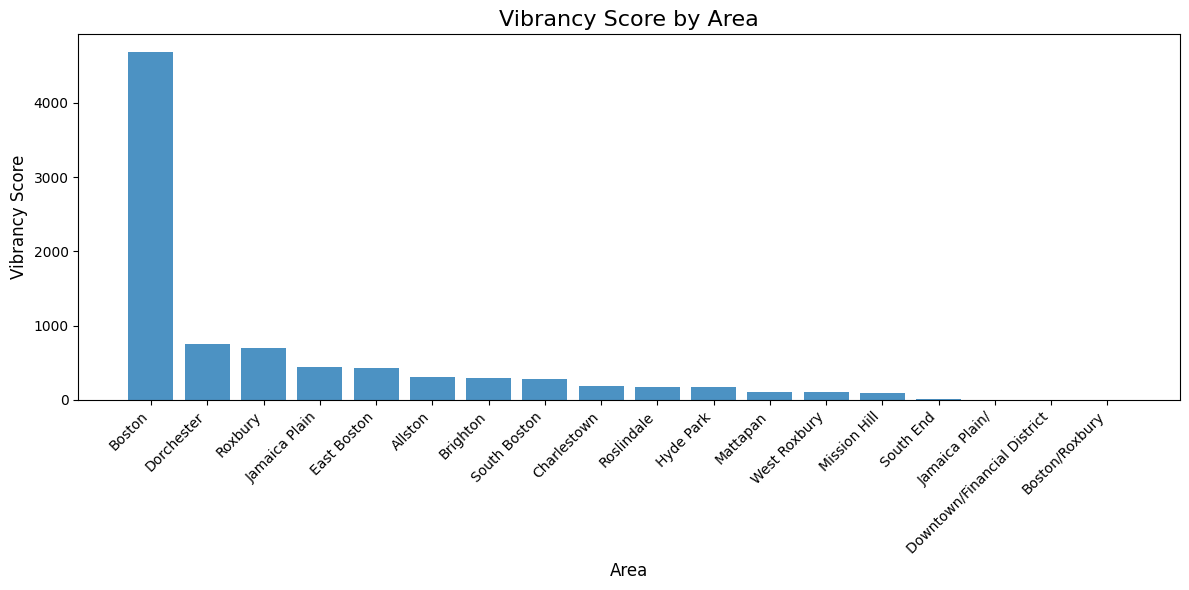

In [9]:
import matplotlib.pyplot as plt

vibrancy_data_sorted = vibrancy_data.sort_values(by='vibrancy_score', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(vibrancy_data_sorted['city_normalized'], vibrancy_data_sorted['vibrancy_score'], alpha=0.8)
plt.title('Vibrancy Score by Area', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Vibrancy Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This chart shows the Vibrancy Score by Area, with Boston having an overwhelmingly high score, indicating its dominance in licensing activity and diversity. Dorchester follows with a significantly lower yet notable score, while areas like Roxbury, Jamaica Plain, and East Boston have moderate vibrancy levels. Other neighborhoods such as Roslindale, Hyde Park, and Mission Hill exhibit comparatively low scores, reflecting limited activity or diversity.

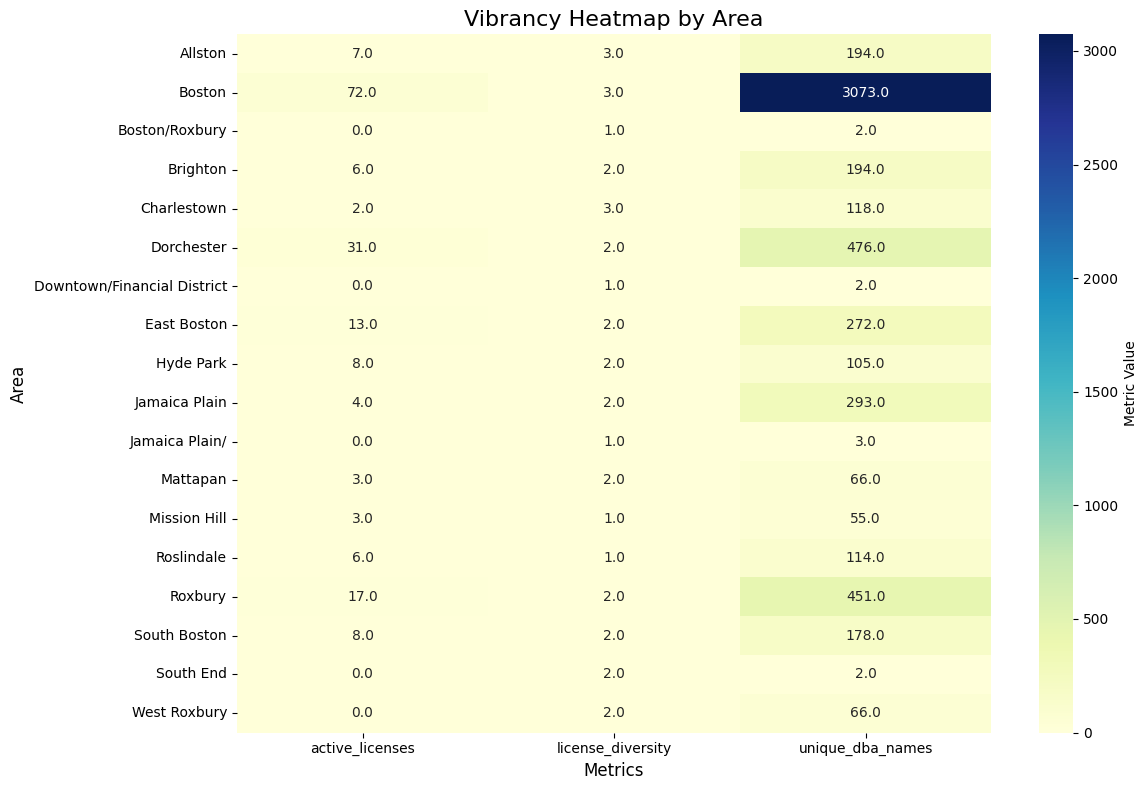

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = vibrancy_data.set_index('city_normalized').drop(columns=['vibrancy_score'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Metric Value'}
)
plt.title('Vibrancy Heatmap by Area', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.tight_layout()
plt.show()

The heatmap compares vibrancy metrics (active licenses, license diversity, and unique DBA names) across areas. Boston significantly outpaces all other areas with the highest values in all metrics, especially unique DBA names, indicating unmatched business activity and diversity. Dorchester shows moderate vibrancy, driven by active licenses and unique DBA names. Other neighborhoods like East Boston, Roxbury, and Jamaica Plain exhibit lower scores, while some areas, such as Downtown/Financial District and West Roxbury, have minimal or no activity across the metrics.

### Filtering out for only district 7

Using a predefined list of census tract IDs that have been identified by us earlier we are filtering relevant areas from a GeoJSON file containing Boston census tract data. Then, license data is converted into a GeoDataFrame with geometry points derived from GPS coordinates (gpsx, gpsy).The filtered census tracts' CRS is updated to match the license GeoDataFrame's CRS for compatibility. After that a spatial join is performed to associate licenses with the filtered census tracts where they intersect.

In [11]:
import geopandas as gpd
from shapely.geometry import Point

# List of census tracts to filter
census_tracts_list = [
    '25025080601', '25025010403', '25025070700', '25025010300', '25025981100',
    '25025120201', '25025980300', '25025010404', '25025010405', '25025080100',
    '25025120301', '25025071101', '25025091300', '25025010500', '25025110105',
    '25025010206', '25025081301', '25025081302', '25025070502', '25025082100',
    '25025010600', '25025070600', '25025080300', '25025080401', '25025080500',
    '25025080801', '25025080900', '25025081400', '25025081500', '25025081700',
    '25025081800', '25025081900', '25025082000', '25025090100', '25025090200',
    '25025090300', '25025090400', '25025090600', '25025090700', '25025091400',
    '25025092400', '25025070902', '25025070802', '25025070801', '25025070901'
]

boston = gpd.read_file("C:/Users/ishan/Desktop/ISHANAY/BU docs/Fall 2024/CDS DS701(Tools for DS)/Project district 7/Boston_census_tract.geojson")

# Filtering `boston` using the list of census tracts
filtered_d7 = boston[boston['geoid20'].isin(census_tracts_list)]  

# Converting License Data to GeoDataFrame
license_data['geometry'] = license_data.apply(lambda row: Point(row['gpsx'], row['gpsy']), axis=1)
license_gdf = gpd.GeoDataFrame(license_data, geometry='geometry', crs="EPSG:2249")
filtered_d7 = filtered_d7.to_crs(license_gdf.crs)

# Spatial Join: Map licenses to the filtered census tracts
filtered_licenses = gpd.sjoin(license_gdf, filtered_d7, how="inner", predicate="intersects")
filtered_d7 = filtered_licenses.drop(columns='geometry')

In [12]:
filtered_d7.head()

,license_num,status,license_type,issued,expires,dba_name,comments,location_comments,applicant,contact,...,statefp20,tractce20,intptlat20,name20,funcstat20,intptlon20,mtfcc20,aland20,awater20,objectid
12,CAL1-175066,Inactive,One-Time Entertainment,NaT,NaT,Gertrue Howes Playground- People of Color Prid...,NaN,NaN,Mala Maya,NaN,...,25,081800,+42.3203184,818,S,-071.0800303,G5020,373922,0,156
14,CAL1-345562,Inactive,One-Time Entertainment,NaT,2017-09-03,Back to School Block Party for Peace,NaN,NaN,Monica Cannon,NaN,...,25,081700,+42.3226992,817,S,-071.0860337,G5020,633875,0,155
15,CAL1-345540,Inactive,One-Time Carnival Ent,NaT,2017-09-06,Northeastern University,NaN,NaN,Nathan Simms,Northeastern University,...,25,010405,+42.3398656,104.05,S,-071.0895958,G5020,364894,0,51
17,CAL1-345108,Inactive,One-Time Carnival Ent,NaT,2017-09-05,Northeastern University,NaN,NaN,Nathan Simms,Northeastern University,...,25,010405,+42.3398656,104.05,S,-071.0895958,G5020,364894,0,51
19,CAL1-493680,Inactive,One-Time Entertainment,NaT,2022-10-02,White Stadium- Covid-19 Vaccination Event,1 Entertainment Sound is not to exceed 70 deci...,NaN,Melissa Hector,NaN,...,25,120301,+42.3126892,1203.01,S,-071.1019405,G5020,657613,0,72


##### Looking for more information on district 7 data

In [13]:
filtered_d7.info

<bound method DataFrame.info of        license_num    status            license_type     issued    expires  \
12     CAL1-175066  Inactive  One-Time Entertainment        NaT        NaT   
14     CAL1-345562  Inactive  One-Time Entertainment        NaT 2017-09-03   
15     CAL1-345540  Inactive   One-Time Carnival Ent        NaT 2017-09-06   
17     CAL1-345108  Inactive   One-Time Carnival Ent        NaT 2017-09-05   
19     CAL1-493680  Inactive  One-Time Entertainment        NaT 2022-10-02   
...            ...       ...                     ...        ...        ...   
17081  CAL1-133871   Expired  One-Time Entertainment 2014-09-19 2014-09-21   
17084  CAL1-133861   Expired  One-Time Entertainment 2014-09-19 2014-09-21   
17094  CAL1-133859   Expired  One-Time Entertainment 2014-09-17 2014-09-27   
17102  CAL1-133876   Expired  One-Time Entertainment 2014-09-17 2014-09-19   
17104  CAL1-133852   Expired  One-Time Entertainment 2014-09-17 2014-09-14   

                               

In [14]:
vibrancy_data_d7 = calculate_vibrancy(filtered_d7)

In [15]:
vibrancy_data_d7

,city_normalized,active_licenses,license_diversity,unique_dba_names,vibrancy_score
0,Boston,12,2,480,736.0
1,Dorchester,10,2,183,288.5
2,Jamaica Plain,2,2,137,211.5
3,Mission Hill,3,1,55,87.5
4,Roxbury,13,2,331,513.5


##### Saving district 7 data into CSV

In [16]:
vibrancy_data_d7.to_csv('one_time_entertainment_data_d7.csv')

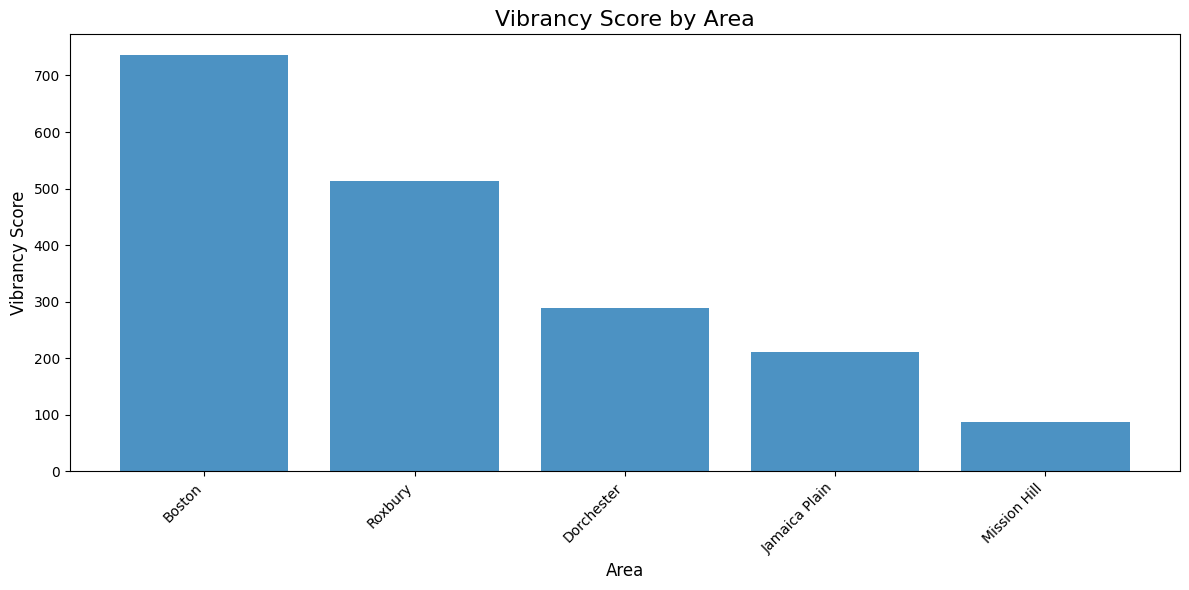

In [17]:
import matplotlib.pyplot as plt

vibrancy_data_sorted_d7 = vibrancy_data_d7.sort_values(by='vibrancy_score', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(vibrancy_data_sorted_d7['city_normalized'], vibrancy_data_sorted_d7['vibrancy_score'], alpha=0.8)
plt.title('Vibrancy Score by Area', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Vibrancy Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart displays the Vibrancy Score by Area for District 7 neighborhoods. Boston leads with the highest vibrancy score, showcasing robust business activity and diversity. Roxbury and Dorchester have moderate scores, reflecting notable activity. Jamaica Plain and Mission Hill score significantly lower, indicating comparatively limited licenses obtained and low diversity.

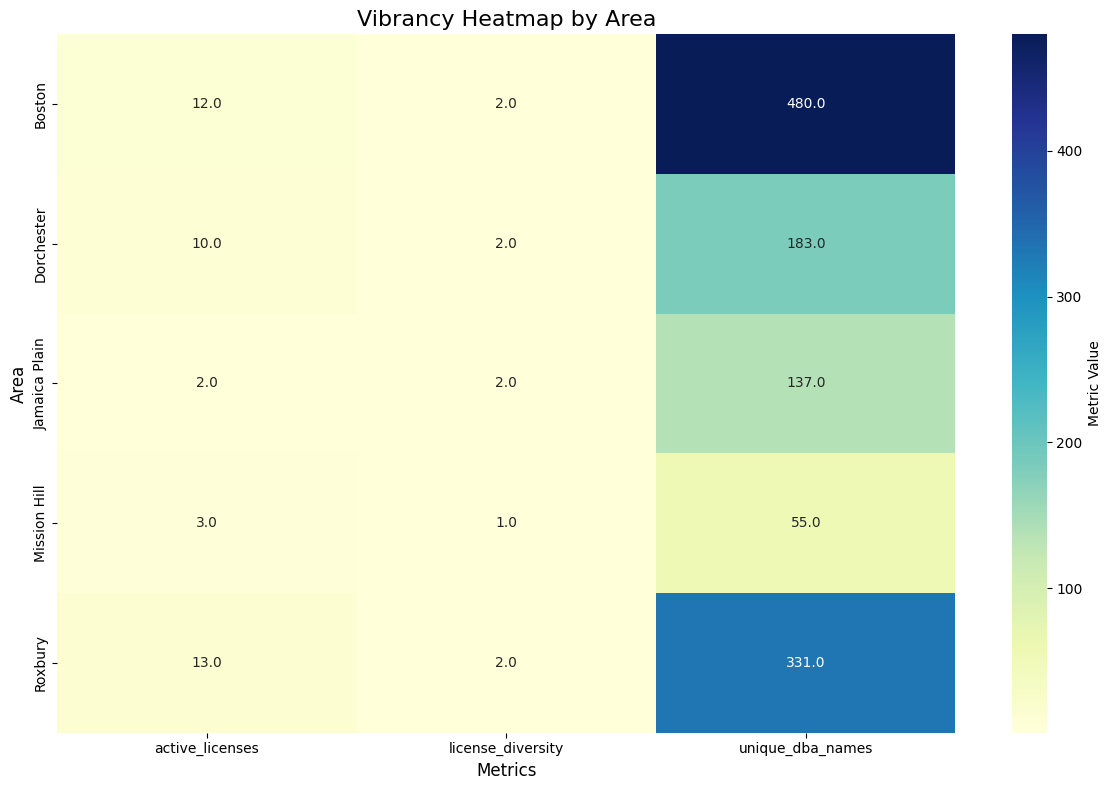

In [18]:
heatmap_data_d7 = vibrancy_data_d7.set_index('city_normalized').drop(columns=['vibrancy_score'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_d7, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Metric Value'}
)
plt.title('Vibrancy Heatmap by Area', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.tight_layout()
plt.show()

The heatmap compares vibrancy metrics (active licenses, license diversity, and unique DBA names) across District 7. Boston shows the highest vibrancy due to a high count of unique DBA names, with moderate active licenses and diversity. Roxbury has significant vibrancy driven by active licenses and DBA names. Dorchester exhibits moderate activity, while Jamaica Plain and Mission Hill show limited business activity and diversity, reflected in their low scores across all metrics.